#                                  Analysis of Tweets for Covid-19 

In this project, we are going to analyse what people talk about Covid-19 in twitter. For this purpose we are using the Twitter's official API to fetch the data. There are various packages available in python which act as a wrapper for the Twitter's official API so and TwitterSearch is one among them. In order to get the access to real time Twitter data, we might need a Twitter developer account. 

In [1]:
from TwitterSearch import TwitterSearch, TwitterSearchOrder, TwitterSearchException

In [2]:
ts = TwitterSearch(access_token=' ', #your access token
                       access_token_secret=' ', #your access token secret
                       consumer_key= ' ', #your consumer key
                       consumer_secret= ' ') # your consumer secret

In [3]:
tso = TwitterSearchOrder()

In [4]:
keywords, language = ['covid'], 'en'

In [5]:
results = []

In [6]:
tso.remove_all_filters()#remove all previously set filters
tso.set_result_type('recent') #you can choose between popular, recent or mixed tweets
tso.set_keywords(keywords) # previously defined keywords
tso.set_language(language) # en = english, de = german, ru=russian and so on
tso.set_include_entities(False) #entities provide additional metadata

In [7]:
for tweet in ts.search_tweets_iterable(tso):
    results.append(tweet)

The output of the following cell gives an outline of the data that we obtain from twitter for each tweet

In [8]:
results[0]

{'created_at': 'Mon Feb 08 13:50:43 +0000 2021',
 'id': 1358775270031826952,
 'id_str': '1358775270031826952',
 'text': 'RT @mayleechai: Attacks against Asian Americans is as old as America itself but the sheer volume and number have gone up astronomically sin…',
 'truncated': False,
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 455949997,
  'id_str': '455949997',
  'name': 'Jennifer Richeson',
  'screen_name': 'jaricheson',
  'location': '',
  'description': 'professor of social psychology with a focus on race, diversity, & social inequality; political junkie; the beach is my happy place',
  'url': 'https://t.co/skhV3MWf67',
  'entities': {'url': {'urls': [{'url': 'https://t.co/skhV3MWf67',

Whooh! We have got so many tweets with us now!

In [9]:
len(results)

18000

In [10]:
import pandas as pd

In [11]:
df = pd.io.json.json_normalize(results)

In [12]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'retweeted_status.quoted_status.place.country',
       'retweeted_status.quoted_status.place.contained_within',
       'retweeted_status.quoted_status.place.bounding_box.type',
       'retweeted_status.quoted_status.place.bounding_box.coordinates',
       'retweeted_status.geo.type', 'retweeted_status.geo.coordinates',
       'retweeted_status.coordinates.type',
       'retweeted_status.coordinates.coordinates', 'withheld_in_countries',
       'user.withheld_in_countries'],
      dtype='object', length=327)

In [13]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,withheld_in_countries,user.withheld_in_countries
0,Mon Feb 08 13:50:43 +0000 2021,1358775270031826952,1358775270031826952,RT @mayleechai: Attacks against Asian American...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Feb 08 13:50:43 +0000 2021,1358775269805486090,1358775269805486090,RT @BLMK_CCGs: If you have an appointment for ...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Feb 08 13:50:43 +0000 2021,1358775268337471490,1358775268337471490,RT @Reuters: French tourists weary of their co...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Feb 08 13:50:43 +0000 2021,1358775267657850883,1358775267657850883,RT @priesterspr: Open neurons you have to unde...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Feb 08 13:50:43 +0000 2021,1358775267334971393,1358775267334971393,RT @MassDPH: The COVID-19 vaccine is FREE. Whe...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let us drop the 'id_str' column since that does not make any sense in our project and let us also set 'id' column as the index since each tweet has its own unique id

In [14]:
df.set_index('id',drop=True,inplace=True)
df.drop('id_str',axis=1,inplace=True)

In [15]:
df.head()

,created_at,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,...,retweeted_status.quoted_status.place.country,retweeted_status.quoted_status.place.contained_within,retweeted_status.quoted_status.place.bounding_box.type,retweeted_status.quoted_status.place.bounding_box.coordinates,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,withheld_in_countries,user.withheld_in_countries
id,,,,,,,,,,,,,,,,,,,,,
1358775270031826952,Mon Feb 08 13:50:43 +0000 2021,RT @mayleechai: Attacks against Asian American...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358775269805486090,Mon Feb 08 13:50:43 +0000 2021,RT @BLMK_CCGs: If you have an appointment for ...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358775268337471490,Mon Feb 08 13:50:43 +0000 2021,RT @Reuters: French tourists weary of their co...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358775267657850883,Mon Feb 08 13:50:43 +0000 2021,RT @priesterspr: Open neurons you have to unde...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358775267334971393,Mon Feb 08 13:50:43 +0000 2021,RT @MassDPH: The COVID-19 vaccine is FREE. Whe...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df[['created_at', 'user.screen_name', 'text']].head()

,created_at,user.screen_name,text
id,,,
1345709889084121089,Sun Jan 03 12:33:34 +0000 2021,HavelockRoadBTN,@onlytruejames @onlytruejosh It's still possib...
1345709886101979138,Sun Jan 03 12:33:33 +0000 2021,LarsAnd04510461,@TayIor69 @1nsane_dev Since when does Apple cu...
1345709885414117376,Sun Jan 03 12:33:33 +0000 2021,hotspritis,its amazing how good and memorable each track ...
1345709880405966850,Sun Jan 03 12:33:32 +0000 2021,miggipsan,RT @kodzekun: BSD 2021 release dates!\n\nbsd c...
1345709875922411523,Sun Jan 03 12:33:31 +0000 2021,wf_jayzee,RT @TheFrogKiller: South Africans 🇿🇦 are showi...


In [16]:
df.shape

(18000, 325)

## Processing the tweets

In [17]:
df['text'].head(n=10)

id
1345709889084121089    @onlytruejames @onlytruejosh It's still possib...
1345709886101979138    @TayIor69 @1nsane_dev Since when does Apple cu...
1345709885414117376    its amazing how good and memorable each track ...
1345709880405966850    RT @kodzekun: BSD 2021 release dates!\n\nbsd c...
1345709875922411523    RT @TheFrogKiller: South Africans 🇿🇦 are showi...
1345709871795081218    RT @sprywc: Due to COVID19 I’ll be blessing th...
1345709870876667936    RT @statisticslm: UK mixers leave spotify if y...
1345709863272329217    RT @williamkruse88: Apple reconsiders banning ...
1345709861900840960    RT @kehindee_b: How to drink apple juice: http...
1345709859988267009                    Eating up https://t.co/lG4xxUckfw
Name: text, dtype: object

Here, we are trying to remove the stopwords from the tweets. Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. 

In [17]:
from nltk.corpus import stopwords

In [18]:
additional  = ['rt','rts','retweet'] # we can store additional stopwords here
swords = set().union(stopwords.words('english'),additional) 

Here are the list of words that are considered as stopwords in the nltk package

In [22]:
swords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Let us remove the duplicate tweets also

In [24]:
df.drop_duplicates(subset='text',inplace=True)

After removing the duplicates we have these many tweets left with us

In [27]:
df.shape

(9772, 325)

Let us also remove special characters, numbers and links

In [28]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

In [29]:
df['processed_text'].head(n=10)

id
1358775270031826952    [attacks, asian, americans, old, america, shee...
1358775269805486090    [appointment, covid, vaccination, today, pleas...
1358775268337471490    [french, tourists, weary, country, strict, nat...
1358775267657850883    [open, neurons, understand, map, road, fear, a...
1358775267334971393    [covid, 19, vaccine, free, turn, receive, vacc...
1358775266923982848    [bangladesh, government, launches, nationwide,...
1358775266894610437    [bangladesh, government, launches, nationwide,...
1358775266865258498    [bangladesh, government, launches, nationwide,...
1358775266529734658    [marc, train, face, covering, reduce, spread, ...
1358775265627832320    [hancock, also, announced, today, government, ...
Name: processed_text, dtype: object

Here, we are stemming the data. Stemming is the process of producing morphological variants of a root/base word.  For example, a stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” 

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [33]:
df['stemmed'].head(n=10)

id
1358775270031826952    [attack, asian, american, old, america, sheer,...
1358775269805486090    [appoint, covid, vaccin, today, pleas, attend,...
1358775268337471490    [french, tourist, weari, countri, strict, nati...
1358775267657850883    [open, neuron, understand, map, road, fear, am...
1358775267334971393    [covid, 19, vaccin, free, turn, receiv, vaccin...
1358775266923982848    [bangladesh, govern, launch, nationwid, mass, ...
1358775266894610437    [bangladesh, govern, launch, nationwid, mass, ...
1358775266865258498    [bangladesh, govern, launch, nationwid, mass, ...
1358775266529734658    [marc, train, face, cover, reduc, spread, covi...
1358775265627832320    [hancock, also, announc, today, govern, secur,...
Name: stemmed, dtype: object

### Sentiment Analysis

In this section let us try to figure out the sentiment reflected in each tweet. For this purpose we use a class called vader from nltk.sentiment which helps us find the sentiment. The more negative the value is, the more negative is the sentiment and vice versa

In [34]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sia = vd.SentimentIntensityAnalyzer()

In [36]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['sentiment_score'] = df['processed_text'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [40]:
df[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
id,,
1358775270031826952,"[attacks, asian, americans, old, america, shee...",-0.9206
1358775269805486090,"[appointment, covid, vaccination, today, pleas...",0.3182
1358775268337471490,"[french, tourists, weary, country, strict, nat...",-0.2732
1358775267657850883,"[open, neurons, understand, map, road, fear, a...",-0.9706
1358775267334971393,"[covid, 19, vaccine, free, turn, receive, vacc...",1.0212
1358775266923982848,"[bangladesh, government, launches, nationwide,...",0.1222
1358775266894610437,"[bangladesh, government, launches, nationwide,...",0.1222
1358775266865258498,"[bangladesh, government, launches, nationwide,...",0.1222
1358775266529734658,"[marc, train, face, covering, reduce, spread, ...",0.3818


In [41]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    7064
 1    1476
-1    1092
 2      77
-2      61
-3       2
Name: sentiment_score, dtype: int64

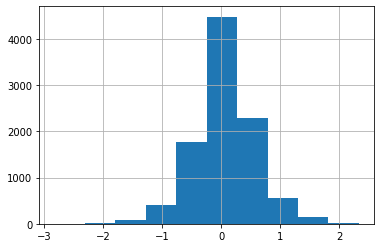

In [110]:
df['sentiment_score'].hist()

In order to make it user understandable, let us categorize this as ['strongly negative', 'negative', 'neutral', 'positive', 'strongly positive'] depending upon the sentiment scores

In [111]:
sent_clasification = pd.cut(df['sentiment_score'],\
          [-3,-1.2, 0, 0.1, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'neutral', 'positive', 'strongly positive'])

In [112]:
sent_clasification.value_counts()

negative             5855
positive             3278
neutral               305
strongly positive     209
strongly negative     125
Name: sentiment_score, dtype: int64

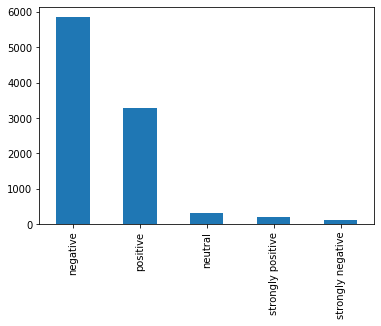

In [113]:
sent_clasification.value_counts().plot(kind='bar')

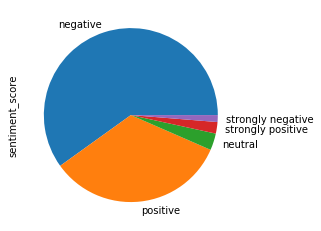

In [114]:
sent_clasification.value_counts().plot(kind='pie')
plt.grid(False)

We can see that  negative tweets are found in a larger proportion

### User Category

Here, let us try to categorize the tweets based on the users who tweeted it. Generally if the followers count of a given user is more, then we can assume that the tweet can be more influencial and vice versa. For this purpose, let us categorize the users as ['small','medium','wide'] depending upon their followers count

In [42]:
df['user_audience_category'] = pd.cut(df['user.followers_count'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [43]:
df['user_audience_category'].head()

id
1358775270031826952    medium
1358775269805486090    medium
1358775268337471490    medium
1358775267657850883     small
1358775267334971393     small
Name: user_audience_category, dtype: category
Categories (3, object): [small < medium < wide]

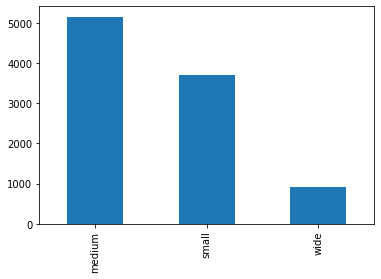

In [109]:
df['user_audience_category'].value_counts().plot(kind='bar',x='User type',y='Range of tweets')

### Location pattern

Now let us understand from where these tweets come and how are they distributed globally. 

In [76]:
locs = df.drop(df[df['user.location'] == ""].index)['user.location']

In [79]:
loc=locs.value_counts().head(n=10)
loc_ind = list(loc.index)
loc_val = list(loc

[117, 99, 95, 82, 73, 64, 60, 52, 50, 38]

In [80]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

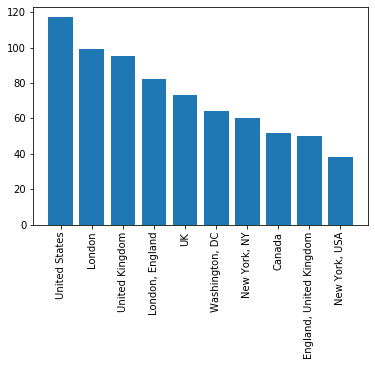

In [81]:
plt.bar(loc_ind,loc_val)
plt.xticks(rotation=90)

### Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [91]:
from wordcloud import WordCloud, STOPWORDS

In [92]:
bigstring = df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

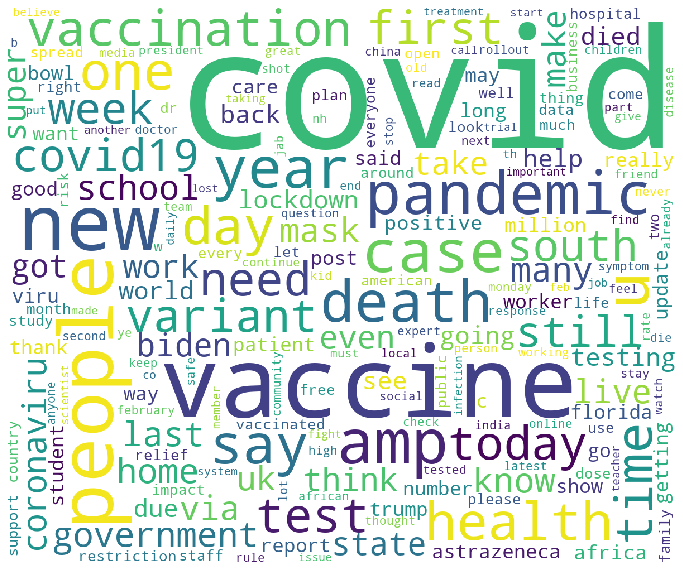

In [93]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### Top Hashtags

As all of us know, hashtags play a curcial role in twitter. Let us find out what are the top hashtags that people use when they tweet something about Covid-19

In [94]:
import re
hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [95]:
hashtags.head(10)

,hashtag,occurences
212,#covid19,218.0
211,#covid,174.0
982,#vaccine,44.0
202,#coronavirus,33.0
221,#covid_19,23.0
900,#superbowl,23.0
704,#pandemic,15.0
60,#astrazeneca,14.0
908,#suriya,13.0
987,#vaccines,13.0


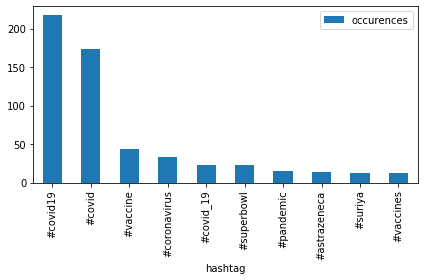

In [96]:
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)

### Top Users Mentioned

Twitter also provides the users with the facility to mention other users in their tweet. Let us find out who are the most tagged people

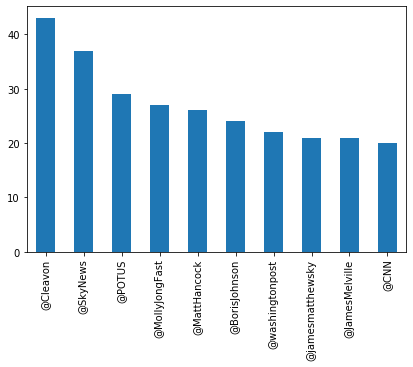

In [97]:
plt.grid(False)
plt.tight_layout()
df['text'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar')

### Top Words

In this section, let us try to figure out what are the most common words that people use when they tweet something about covid

In [98]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [99]:
words.head(10)

,word,occurences
2114,covid,2769.0
88,19,1272.0
8552,vaccine,436.0
5990,people,317.0
3598,get,202.0
637,amp,196.0
5539,new,183.0
5881,pandemic,183.0
3868,health,156.0
1528,cases,149.0


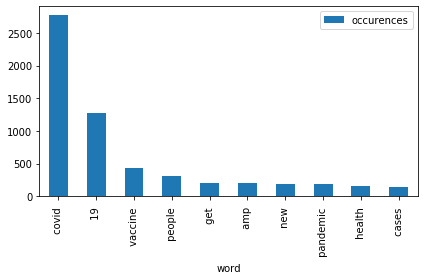

In [100]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()

### Top Bigrams

 Bigram is two consecutive words in a sentence. In this section, let us find out what are the most commonly found bigrams 

In [101]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [102]:
bigramseries.head(10)

(covid, 19)         2460
(19, vaccine)        305
(covid, vaccine)     238
(super, bowl)        135
(south, africa)      120
(19, pandemic)       107
(get, covid)         106
(19, vaccines)       101
(due, covid)          95
(19, cases)           92
dtype: int64

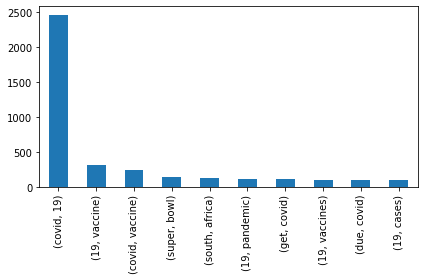

In [103]:
bigramseries[:10].plot(kind='bar')
plt.tight_layout()